<a href="https://colab.research.google.com/github/pedr19faria/Neuro-Comp/blob/main/Lista_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lista 2
Pedro Faria Albuquerque

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# importando o que será usado

**Equações do modelo de Hodgkin-Huxley**

In [ ]:
# Função que usa o método de euler para resolver o sistema de equações
def hh_equations(f, dt, t0, tf, ti_disp, tf_disparo,alphan, betan , alpham, betam, alphah, betah, Jinj, V0 = 0. , n0 = 0.32, m0 = 0.05, h0 = 0.6):
    import numpy as np
    n_eq = 4

    t_total = int((tf - t0) / dt) + 1

    y = np.zeros((t_total))  # array for y values in each time step

    t = np.zeros((t_total))
    t[0] = t0


    volt = np.zeros((t_total))
    n = np.zeros((t_total))
    m = np.zeros((t_total))
    h = np.zeros((t_total))


    u0 = np.zeros([4])
    u1 = np.zeros_like(u0)

    u0[0] = V0
    u0[1] = n0
    u0[2] = m0
    u0[3] = h0

    for i in range( t_total-1):

      volt[i] = u0[0]
      n[i] = u0[1]
      m[i] = u0[2]
      h[i] = u0[3]

      t[i + 1] = t[i] + dt
      if t[i] >= ti_disp and t[i] <= tf_disparo:
        u1 = u0 + dt*f(t[i], n_eq, u0, alphan, betan , alpham, betam, alphah, betah, Jinj)
      else:
        u1 = u0 + dt*f(t[i], n_eq, u0, alphan, betan , alpham, betam, alphah, betah, Jinj = 0.) # Aqui J = 0
      u0 = np.copy(u1)

    return volt, n, m , h, t


In [ ]:
# O sistema de equações do modelo de Hodgkin Huxley
def hodgkin_huxley(t, n_eq, u, alphan, betan , alpham, betam, alphah, betah, Jinj):
  #uprime = [V, n, m, h]

  uprime = np.zeros(n_eq)

  uprime[0] = (-(gna)*(u[2]**3)*u[3]*(u[0] -Ena) - (gk)*(u[1]**4)*(u[0] - Ek) - gv*(u[0] - Ev) + Jinj)/Cm

  uprime[1]= alphan(u[0])*(1-u[1]) - betan(u[0])*u[1]

  uprime[2] = alpham(u[0])*(1-u[2]) - betam(u[0])*u[2]

  uprime[3] = alphah(u[0])*(1-u[3]) - betah(u[0])*u[3]

  return uprime



In [ ]:
# As equações que descrevem alpha_i e beta_i, i= {n,m,h}

import math

def alpha_n(V):
    numerator = 0.01 * (10 - V)
    denominator = math.exp((10 - V) / 10) - 1

    # Apply L'Hôpital's rule if numerator and denominator both approach zero
    if abs(numerator) < 1e-8 and abs(denominator) < 1e-8:
        numerator_prime = -0.01
        denominator_prime = -0.1 * math.exp((10 - V) / 10) / 10
        return numerator_prime / denominator_prime
    elif abs(denominator) < 1e-8:
        return float('inf')  # Division by zero, denominator approaches zero
    else:
        return numerator / denominator


def beta_n(V):
    betan = (0.125)*np.exp(-(V/80))
    return betan
def alpha_m(V):
    numerator = 0.1 * (25 - V)
    denominator = math.exp((25 - V) / 10) - 1

    # Apply L'Hôpital's rule if numerator and denominator both approach zero
    if abs(numerator) < 1e-8 and abs(denominator) < 1e-8:
        numerator_prime = -0.1
        denominator_prime = -0.1 * math.exp((25 - V) / 10) / 10
        return numerator_prime / denominator_prime
    elif abs(denominator) < 1e-8:
        return float('inf')  # Division by zero, denominator approaches zero
    else:
        return numerator / denominator


def beta_m(V):
    betam = 4.*np.exp(-(V/18.))
    return betam

def alpha_h(V):
    alphah = (0.07)*np.exp(-(V/20.))
    return alphah


def beta_h(V):
    denominator = (np.exp((30. - V)/10.) + 1.)
    betah = 1./denominator
    return betah


In [ ]:
### Condições iniciais:
gna = 120 #mS/cm2
Ena = 115 #mV

gk = 36 #mS/cm2
Ek = -12 #mV

gv = 0.3 #mS/cm2
Ev = 10.6 #mV

Cm = 1. #10-6F/cm2

# O tempo tem que ser medido em mS

In [ ]:
def J_list(J, time, ti_disp, tf_disp) :
  import numpy as np
  J_list = np.zeros(len(time))
  for i in range(len(time)):
    if time[i] >= ti_disp  and time[i] <= tf_disp:
      J_list[i] = J
  return J_list
# função para transformar em lista para poder plotar

In [ ]:
def plot(V, n, m, h, J, t):
  import matplotlib.pyplot as plt

  fig, (ax,ax1,ax2) = plt.subplots(3,1, figsize = (6,8))
  ax.plot(t, V)
  ax1.plot(t,n, label = 'n')
  ax1.plot(t,m, label = 'm')
  ax1.plot(t,h, label = 'h')
  ax2.plot(t, J, label = f'J = {np.max(np.abs(J))}')
  ax2.set(ylabel=r'$J \frac{\mu A}{cm^2}$', xlabel='time (ms)')
  ax1.set(ylabel='Gating Variables', xlabel='time (ms)')
  ax.set(ylabel='Voltage (mV)', xlabel='time (ms)')
  ax2.legend()
  ax1.legend()


# Função para plotar os gráficos pedidos

In [ ]:
# Essa função serve para simplificar o estudos das diferentes densidades de correntes e duração de injeção
# Fazendo com que ao colocarmos os valores desejados já aparece o gráfico
def function(J, t0, tf, dt, ti_disparo, tfinal_disparo):
  volt, n, m , h, time = hh_equations(hodgkin_huxley, dt, t0, tf, ti_disparo, tfinal_disparo,alpha_n, beta_n , alpha_m, beta_m, alpha_h, beta_h, J, V0 = 0. , n0 = 0.32, m0 = 0.05, h0 = 0.6)
  Jinj_list = J_list(J, time, ti_disparo, tfinal_disparo)
  plot(volt, n , m , h, Jinj_list, time

**Questão 1**

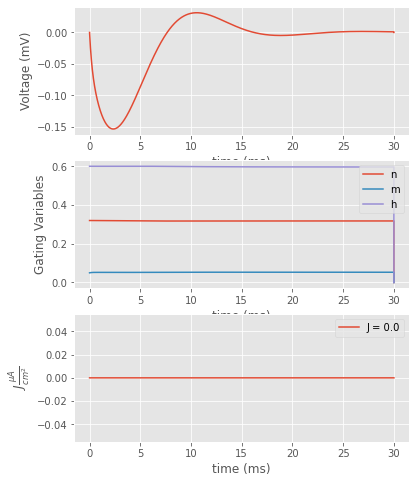

In [ ]:
# J = 0, duração do experimento = 30 ms, delta t = 0.001 ms
function(0., 0., 30.,1e-3, 0., 30.)

Percebe-se que a voltagem V se estabiliza em torno do zero. No repouso, como *m* é pequeno e *h* é grande o produto $m^3h$ é pequeno, porém diferente de zero, logo ha uma condutância do sódio. Já *n* tem um valor não tão alto, nem tão baixo, mas $n^4$ é um valor pequeno. Esses produtos estão relacionados com a condutância de sódio e de potássio, assim existem correntes de ambos, porém bem pequenas. Como existem tais correntes ocorre essa leve hiperpolarização seguida da despolarização pequena que logo se estabiliza no potencial de repouso do sistema.

**Questão 2**

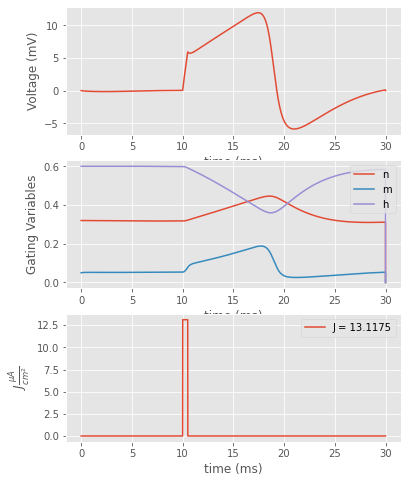

In [ ]:
# J = 13.1175, duração do experimento = 30 ms, delta t = 0.001 ms, duração da injeção = 0.5
# Tempo inicial de J = 10
function(13.1175,0., 30., 0.001, 10., 10.5)

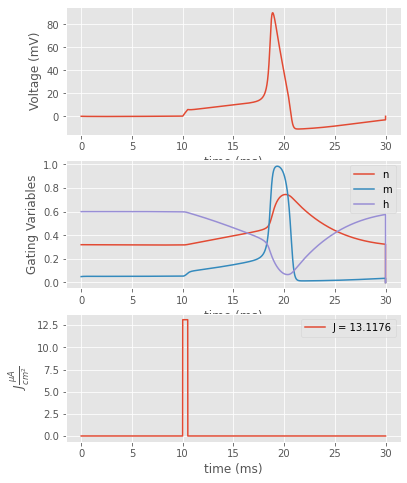

In [ ]:
# J = 13.1176, duração do experimento = 30 ms, delta t = 0.001 ms, duração da injeção = 0.5 ms
# Tempo inicial de J = 10
function(13.1176,0., 30., 0.001, 10., 10.5)

Percebe-se que uma boa estimativa para o limiar de corrente na forma de pulso curto com 0,5 ms de duração que gera um disparo é $J = 13,1176 \frac{\mu A}{cm^2}$

**Questão 3**

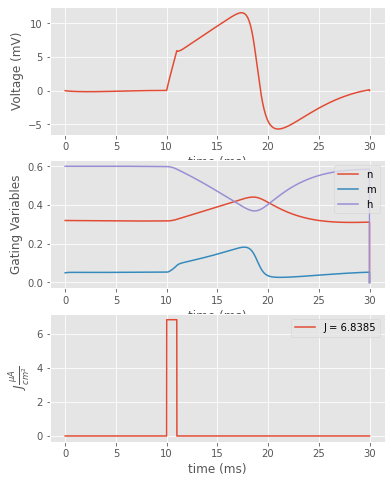

In [ ]:
# J = 6.8385, duração do experimento = 30 ms, delta t = 0.001 ms, duração da injeção = 1. ms
# Tempo inicial de J = 10
function(6.8385,0., 30., 0.001, 10., 11.)

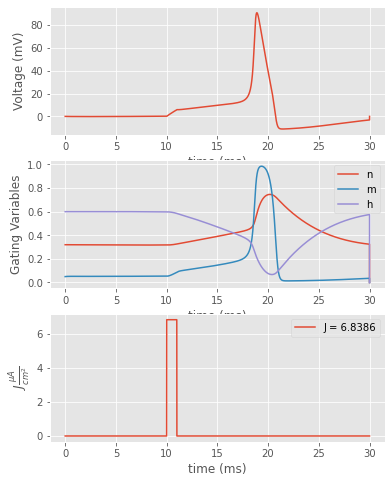

In [ ]:
# J = 6.8386, duração do experimento = 30 ms, delta t = 0.001 ms, duração da injeção = 1. ms
# Tempo inicial de J = 10
function(6.8386,0., 30., 0.001, 10., 11)

Novamente, mas agora com um pulso de 1,0 ms uma boa estimativa de limiar de corrente é $J = 6,8386 \frac{\mu A}{cm^2}$ . Assim, percebe-se que ao fazermos com que a corrente injetada dure mais tempo a sua amplitade pode ser menor e provocar um disparo mesmo assim.

**Questão 4**

**i)** um valor de J que não produz disparos

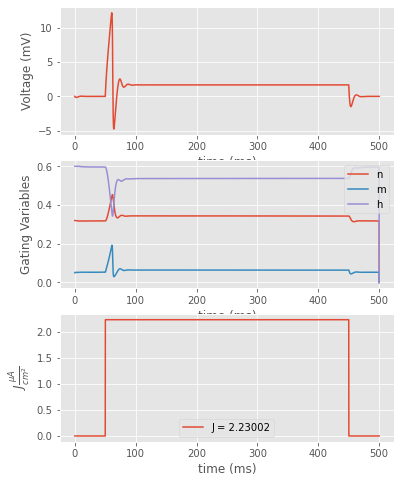

In [ ]:
# J = 2.23002, duração do experimento = 500 ms, delta t = 0.025 ms, duração da injeção = 400. ms
# Tempo inicial de J = 50. ms
function(2.23002, 0., 500. , 0.025, 50., 450.)

**(ii)** o valor de *J* da reobase

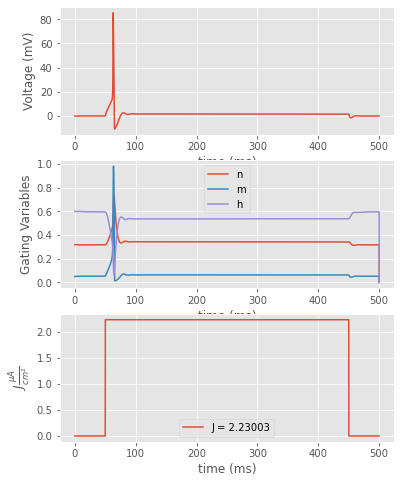

In [ ]:
# J = 2.23003, duração do experimento = 500 ms, delta t = 0.025 ms, duração da injeção = 400. ms
# Tempo inicial de J = 50. ms
function(2.23003, 0., 500. , 0.025, 50., 450.)

Percebe-se que a menor corrente capaz de provocar um disparo com essa duração longa é $J = 2,23003 \frac{\mu A}{cm^2}$

**(iii)** o valor de *J* que produz dois disparos

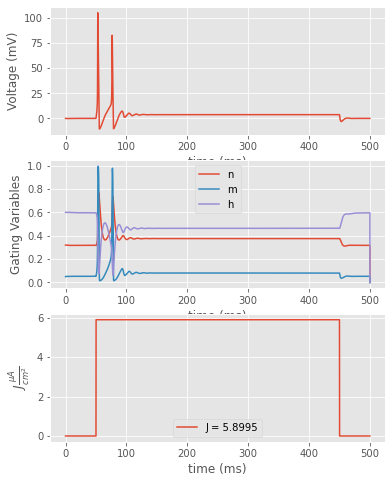

In [ ]:
# J = 5.8995, duração do experimento = 500 ms, delta t = 0.025 ms, duração da injeção = 400. ms
# Tempo inicial de J = 50. ms
function(5.8995, 0., 500. , 0.025, 50., 450.)

**(iv)**  o menor valor de *J* capaz de produzir um trem de disparos pela duração da simulação

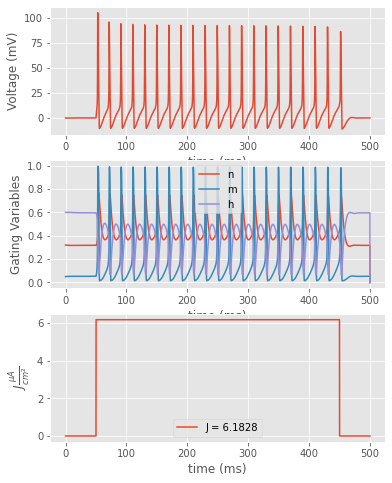

In [ ]:
### J = 6.1828, duração do experimento = 400 ms, delta t = 0.025 ms, duração da injeção = 400. ms
# Tempo inicial de J = 50. ms
function(6.1828, 0., 500. , 0.025, 50., 450.)

**Questão 5**
\
$f = \dfrac{\text{Número de disparos emitidos durante T}}{T} * 10^3 Hz$ \
Sendo T o período em que a densidade de corrente foi injetada no sistema e multiplica-se por $10^3$, pois o tempo T está em milisegundos e $Hz = \dfrac{1}{s}$.



In [ ]:
J_q = 6.15
tf_J = 450.
ti_J = 50.
t0 = 0.
tf = 500.
dt = 0.025
volt, n, m , h, time = hh_equations(hodgkin_huxley, dt, t0, tf, ti_J, tf_J,alpha_n, beta_n , alpha_m, beta_m, alpha_h, beta_h, J_q, V0 = 0. , n0 = 0.32, m0 = 0.05, h0 = 0.6)

In [ ]:
import numpy as np
from scipy.signal import find_peaks
# função que mostra a quantidade de máximos em uma função. No nosso caso temos a função voltagem que a cada potencial de ação
# apresenta um pico
peaks, _ = find_peaks(volt, height = 15)
num_oscillations = len(peaks)

print("Number of oscillations:", num_oscillations)


Number of oscillations: 4


In [ ]:
frequencia = num_oscillations/(tf_J - ti_J) *1e3

In [ ]:
frequencia

10.0

Agora vamos fazer isso para 50 pontos diferentes com densidades de corrente variando de 6.15 até 200

In [ ]:
corrente = np.linspace(6.15, 200., 50) # Vai pega 200 pontos de 6.15 até 200.
voltagens = [] # array com 200 pontos, também
for i in range(len(corrente)):
  Voltagem, n, m , h, time = hh_equations(hodgkin_huxley, dt, t0, tf, ti_J, tf_J,alpha_n, beta_n , alpha_m, beta_m, alpha_h, beta_h, corrente[i], V0 = 0. , n0 = 0.32, m0 = 0.05, h0 = 0.6)
  voltagens.append(Voltagem)

# Lista com 200 pontos, para as diferentes voltagens



In [ ]:
len(voltagens)

50

In [ ]:
quant_disparos = [] # quantidade de máximos das voltagens que correspondem ao número de disparos
# Só conta os máximos maiores que um certo valor, no caso 25
# a partir de observação voltagens maiores que 25 apresentam potencial de acao

for i in range(len(voltagens)):
  peaks, _ = find_peaks(voltagens[i], height = 40)
  quant_disparos.append(len(peaks))

frequencia = num_oscillations/(tf_J - ti_J) *1e3

In [ ]:
frequencia = [(j/(tf_J - ti_J))*1e3 for j in quant_disparos]


In [ ]:
indice = np.where(np.array(frequencia) == max(frequencia))
ind = indice[0][0]

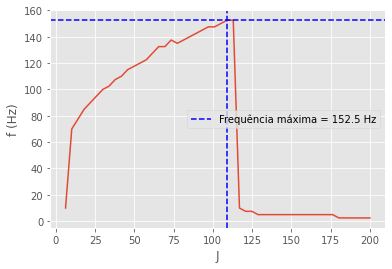

In [ ]:
plt.plot(corrente, frequencia)
plt.xlabel('J')
plt.ylabel(r'f (Hz)')

plt.axhline(frequencia[ind], linestyle = '--', c = 'b', label = f'Frequência máxima = {max(frequencia)} Hz')
plt.axvline(corrente[ind], linestyle = '--', c = 'b')
plt.legend()
plt.show()


A medida que a densidade de corrente aumenta vemos um aumento na frequência até que esta atinge um máximo, como mostrado no gráfico acima. A partir de tal valor de densidade de corrente não é possivel gerar tantos disparos durante aquele período de tempo e ela decaí. Isso se deve ao fato de que a medida que o valor da densidade de corrente J aumenta a amplitude do potencial de ação diminui, fazendo com que chegue em um valor que J é tão alto que não há mais potencial de ação. Dessa forma, como não se tem mais potencial de ação não é observado disparos, tal fenômeno é chamado de 'bloqueio por excitação'. Isso pode ser observado no gráfico abaixo, em que J= 200 e o potencial de ação ocorre pouquissímas vezes.

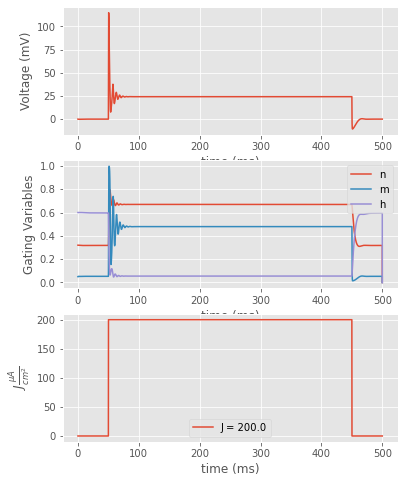

In [ ]:
function(200., 0., 500. , 0.025, 50., 450.)

**Questão 6**

Quando emitimos uma densidade de corrente grande o suficiente para que haja um potencial de ação uma série de reações irão ocorrer no neurônio para que isso ocorra, podendo ser entendido através das variáveis de gating *m, h e n* que representam a variável de ativação do sódio, de inativáção do sódio e de ativação do potássio. De maneira simplificada, podemos dizer que ao iniciar a despolarização teremos um crescimento rápido de *m* e um declinío lento de *h*, fazendo com que a condutâncio do sódio - que é proporcional a ambos- aumente. Tal fato provoca um fluxo ao interior da célula de íons de sódio, que é o momento de aumento do potencial de ação. Porém chega um momento, em que *h* se anula e *m* chega em 1, fazendo com que a condutância do sódio vá para zero, ou seja, não se pode mais haver passagem de sódio. Como *h* chegou a zero e se mantém em valores muito baixos a condutância do sódio permanece inativada e isso causa o **período regratário absoluto**, período este que independente dos valores de *J* aplicados não haverá geração de potencial de ação. A medida que o *h* retorna a seu valor normal começa um período em que poderá haver geração de potencial de ação, mas apenas se o *J* aplicado seja forte o suficiente, este é o **peródo refratário relativo**.

In [ ]:
# Ajuste da Função para permitir a injeção de duas correntes
# L é o tempo de espera até a injeção da segunda corrente
def hh_double(f, dt, t0, tf, ti_disp,duration1, ti_L, duration2, alphan, betan , alpham, betam, alphah, betah, Jinj, J2,  V0 = 0. , n0 = 0.32, m0 = 0.05, h0 = 0.6):
    import numpy as np
    n_eq = 4

    tf_disparo = ti_disp + duration1
    tf_L = ti_L + duration2

    t_total = int((tf - t0) / dt) + 1

    L = ti_L - ti_disp

    y = np.zeros((t_total))  # array for y values in each time step

    t = np.zeros((t_total))
    t[0] = t0


    volt = np.zeros((t_total))
    n = np.zeros((t_total))
    m = np.zeros((t_total))
    h = np.zeros((t_total))


    u0 = np.zeros([4])
    u1 = np.zeros_like(u0)

    u0[0] = V0
    u0[1] = n0
    u0[2] = m0
    u0[3] = h0

    for i in range( t_total-1):

      volt[i] = u0[0]
      n[i] = u0[1]
      m[i] = u0[2]
      h[i] = u0[3]

      t[i + 1] = t[i] + dt
      if t[i] >= ti_disp and t[i] <= tf_disparo:
        u1 = u0 + dt*f(t[i], n_eq, u0, alphan, betan , alpham, betam, alphah, betah, Jinj)
      elif t[i]  >= ti_L and t[i] <= tf_L:
        u1 = u0 + dt*f(t[i], n_eq, u0, alphan, betan , alpham, betam, alphah, betah, J2)
      else:
        u1 = u0 + dt*f(t[i], n_eq, u0, alphan, betan , alpham, betam, alphah, betah, Jinj = 0.) # Aqui J = 0
      u0 = np.copy(u1)


    return volt, n, m , h, t, L


In [ ]:
def J_double(J,J2, time, ti_disp, duration1,ti_L, duration2) :
  import numpy as np
  tf_disp = ti_disp + duration1
  tf_L = ti_L + duration2
  J_list = np.zeros(len(time))
  for i in range(len(time)):
    if time[i] >= ti_disp  and time[i] <= tf_disp:
      J_list[i] = J
    elif time[i] >= ti_L and time[i] <= tf_L:
      J_list[i] = J2


  return J_list

In [ ]:
def function2(J, J2 ,t0, tf, dt, ti_disparo, duration1,  ti_L, duration2):
  volt, n, m , h, time, L = hh_double(hodgkin_huxley, dt, t0, tf, ti_disparo, duration1, ti_L, duration2, alpha_n, beta_n , alpha_m, beta_m, alpha_h, beta_h, J, J2,  V0 = 0. , n0 = 0.32, m0 = 0.05, h0 = 0.6)
  J_list = J_double(J, J2, time, ti_disparo, duration1, ti_L, duration2)
  print(f'L = {L} ms')
  plot(volt, n , m , h, J_list, time)



Nesta questão usaremos um pulso de corrente com duração 0,5 ms e valor de J, chamado de $J_1$ que garante a produção de um potencial de ação - valor um pouco acima do encontrado na questão anterior - e um tempo $L$ depois será aplicado mais um pulso $J_2$ de amplitude igual ao anterior. Pelo gráfico abaixo o menor tempo após o primeiro pulso, em que ocorre mais um potencial de ação é **16,7391 ms**. Dessa forma, podemos dizer que esse é o período refratário do modelo quando $J = 15\frac{\mu A}{cm^2}$, ou seja, o menor tempo para que após um potencial de ação seja possível gerar mais um potencial com uma densidade de corrente de $15\frac{\mu A}{cm^2}$. É perceptível que o potencial não é tão forte como o primeiro, algo que faz sentido, afinal nem as variáveis de gating haviam voltado completamente a seus valores de repouso. \


L = 16.7391 ms


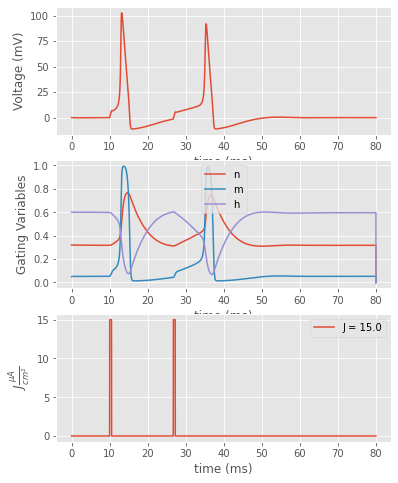

In [ ]:
function2(15., 15.,0., 80., 0.001, 10., 0.5, 26.7391, 0.5)

Agora vamos usar valores de $J_2$ maiores que o $J_1$ e achar o período, em que independente da amplitude do pulso $J_2$ não ocorre potencial de ação. Esse momento é o **período refratário absoluto**.

Como já dito o **período refratário absoluto** é o período, em que a célula não responde ao estímulo externo, mesmo que esse seja de intensidade suficientemente alta. Assim, desenvolveu-se uma função que testava densidades de correntes $J_2$ variando desde 15 até 100 para diferentes valores de L. Assim, se para aquele valor de L determinado não se produziu um potencial de ação em nenhuma das densidades de correntes utilizadas, pode se dizer que ainda está no período refratário absoluto. E a partir de alguns testes percebe-se que o **período refratário absoluto** da função vai até **8,75 ms**, aproximadamente.

In [ ]:
def check_action_potential(L, dt = 0.001, t0 = 0., tf = 80., ti_disp = 10., disp1 = 0.5, disp2 = 0.5, Jinj = 15.):
# Temos as voltagens para as correntes de 15 a 100 para L = 6
# Vamos ver quantos picos maiores que 30 mV aparecem na lista de voltagens com diferentes J
# se for no máximo 1, então ocorreu apenas o potencial de ação devido a primeira injeção de corrente
    ti_L = ti_disp + L
    corrente2 = np.linspace(15., 100., 30)
    Voltags = []
    for i in range(len(corrente2)):
      Voltag, n_v, m_v , h_v, time_v, L =hh_double(hodgkin_huxley, dt, t0, tf, ti_disp,disp1, ti_L, disp2, alpha_n, beta_n , alpha_m, beta_m, alpha_h, beta_h, Jinj, corrente2[i],  V0 = 0. , n0 = 0.32, m0 = 0.05, h0 = 0.6)
      Voltags.append(Voltag)
    quant_pa = []
    for i in range(len(Voltags)):
      peaks, _ = find_peaks(Voltags[i], height = 30)
      quant_pa.append(len(peaks))
    if np.max(quant_pa) > 1:
        print(f'Houve mais que um potencial de ação para L = {L} ms')
        plt.plot(time_v, Voltags[-1])
        plt.xlabel('time (ms)')
        plt.ylabel('Voltage (mV)')
    elif np.max(quant_pa) == 1:
        print(f'Para L = {L} ms ainda não há um segundo potencial de ação')

Houve mais que um potencial de ação para L = 11.0 ms


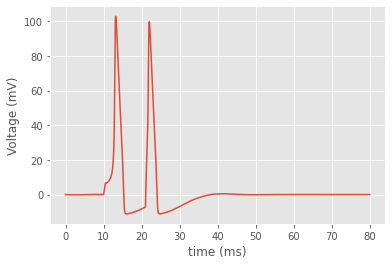

In [ ]:
check_action_potential(11.)

Houve mais que um potencial de ação para L = 9.0 ms


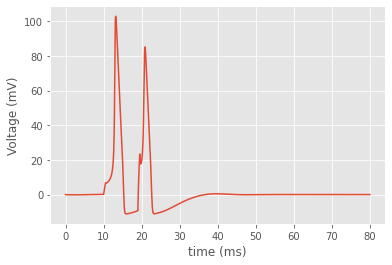

In [ ]:
check_action_potential(9.)

In [ ]:
check_action_potential(8.)

Para L = 8.0 ms ainda não há um segundo potencial de ação


In [ ]:
check_action_potential(8.5)

Para L = 8.5 ms ainda não há um segundo potencial de ação


In [ ]:
check_action_potential(8.75)

Para L = 8.75 ms ainda não há um segundo potencial de ação


#### Questão 7


Na questão a seguir a densidade de corrente injetada tem valor negativo $J = - 15\frac{\mu A}{cm^2}$, sendo assim ao invés de despolarizar a célula, iremos hiperpolarizá-la, com a intenção de ver se é possível provocar um potencial de ação através da injeção dessa densidade de corrente negativa por tempo o suficiente.

T = 1.0 ms


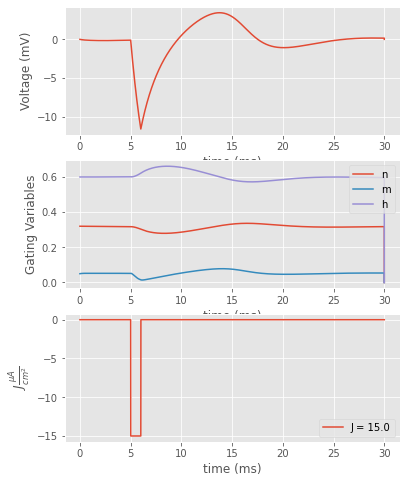

In [ ]:
function(-15., 0., 30., 0.001, 5., 6.0)
print(f'T = {6. - 5.} ms')

T = 2.0 ms


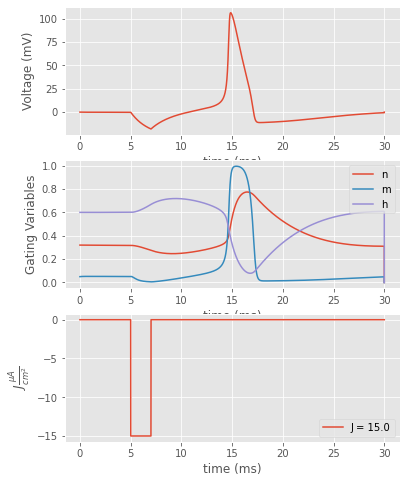

In [ ]:
function(-15., 0., 30., 0.001, 5., 7.0)
print(f'T = {7.0 - 5.0 } ms')

Ao aplicarmos esse valor de corrente negativa, pode se ver pelo gráfico das gating variables que o *h* aumenta brevemente, enquanto *n* e *m* diminuem. Posteriormente, a váriavel *m* vai crescer rapidamente, como é normalmente, e *h* irá diminuir. Porém, nesse caso h está a um valor maior que ele normalmente está nesse ponto, devido a subida no início e isso faz com que $m^{3}h$ esteja mais alto que nos casos da despolarização, assim gera-se um potencial de ação.

In [ ]:
def function_variables(J, t0, tf, dt, ti_disparo, tfinal_disparo):
  volt, n, m , h, time = hh_equations(hodgkin_huxley, dt, t0, tf, ti_disparo, tfinal_disparo,alpha_n, beta_n , alpha_m, beta_m, alpha_h, beta_h, J, V0 = 0. , n0 = 0.32, m0 = 0.05, h0 = 0.6)
  Jinj_list = J_list(J, time, ti_disparo, tfinal_disparo)
  plot(volt, n , m , h, Jinj_list, time)
  return n, m, h, time



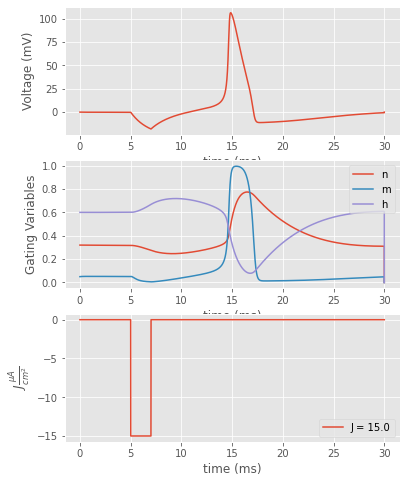

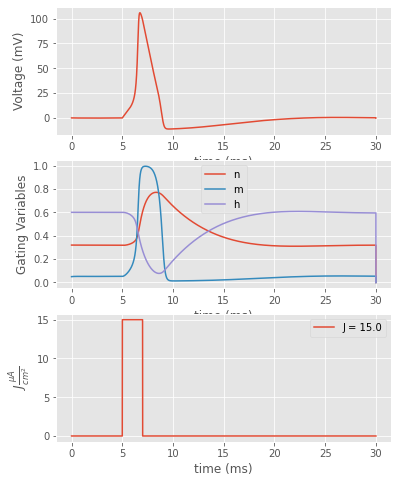

In [ ]:

n1,m1,h1, time1 = function_variables(-15., 0., 30., 0.001, 5., 7.0)

n2,m2,h2, time2 = function_variables(15., 0., 30., 0.001, 5., 7.0)

In [ ]:
produto_1 = ((m1)**3)*h1
produto_2 =  ((m2)**3)*h2

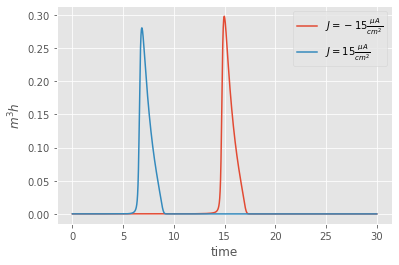

In [ ]:
plt.plot(time1, produto_1, label = r'$J = -15\frac{\mu A}{cm^2}$')
plt.plot(time2, produto_2, label = r'$J = 15\frac{\mu A}{cm^2}$')
plt.xlabel('time')
plt.ylabel(r'$m^3h$')

plt.legend()
plt.show()

A partir desse gráfico percebe-se que no momento em que a condutância do sódio está no seu máximo para o experimento com a hiperpolarização, $J = -15\frac{\mu A}{cm^2}$, esse valor é maior do que para a despolarização, $J = 15\frac{\mu A}{cm^2}$.